<a href="https://colab.research.google.com/github/YuHsin-Chen1221/Computational-Neural-Science/blob/main/EEG_Analysis_%26_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install mne

In [2]:
import mne
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
path = files.upload()

Saving 2_unatt_b-Deci.bdf to 2_unatt_b-Deci.bdf


TypeError: expected str, bytes or os.PathLike object, not dict

In [39]:
filename = list(path.keys())[0]
raw = mne.io.read_raw_bdf(filename, preload=True)

Extracting EDF parameters from /content/2_unatt_b-Deci.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 555007  =      0.000 ...  1083.998 secs...


In [19]:
raw.info  # View metadata

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 79 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 104.0 Hz
 meas_date: 2013-08-22 13:48:19 UTC
 nchan: 80
 projs: []
 sfreq: 512.0 Hz
 subject_info: <subject_info | his_id: >
>

In [20]:
n_time_samps = raw.n_times
time_secs = raw.times
ch_names = raw.ch_names
n_chan = len(ch_names)

print(ch_names)
print(n_chan)

['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'GSR1', 'GSR2', 'Erg1', 'Erg2', 'Resp', 'Plet', 'Temp', 'Status']
80


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed:    3.2s finished


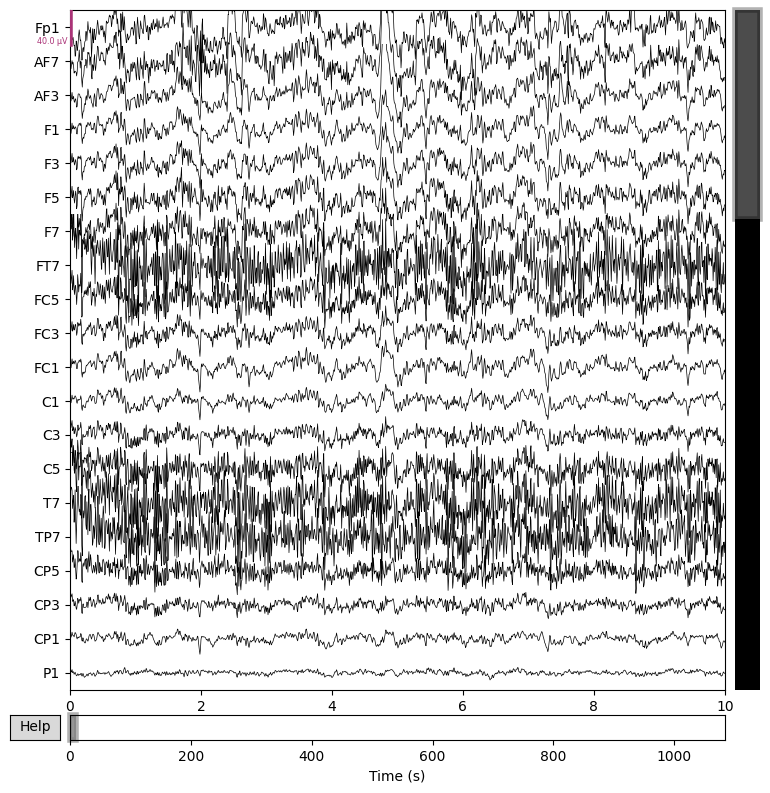

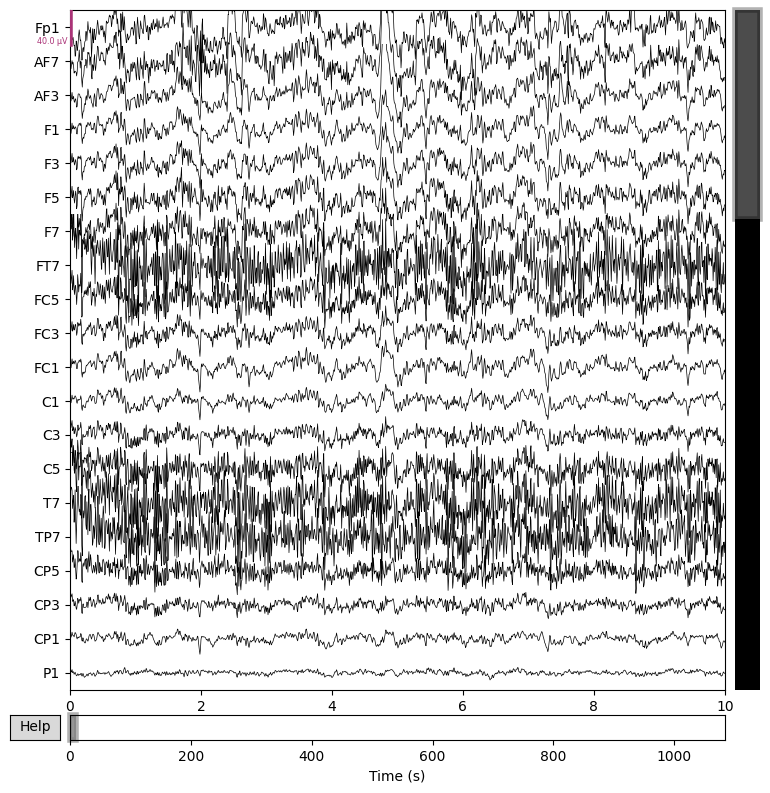

In [40]:
raw.filter(l_freq=1., h_freq=40.) # Remove slow drifts (<1 Hz) and high-frequency noise (>40 Hz)
raw.drop_channels(["EXG1", "EXG2", "EXG3", "EXG4", "EXG5", "EXG6", "EXG7", "EXG8", "GSR1", "GSR2", "Erg1", "Erg2", "Resp", "Plet", "Temp"])
raw.plot()


In [41]:
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)
raw.set_eeg_reference('average', projection=True)

EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


<RawEDF | 2_unatt_b-Deci.bdf, 65 x 555008 (1084.0 s), ~275.3 MiB, data loaded>

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 33.7s.


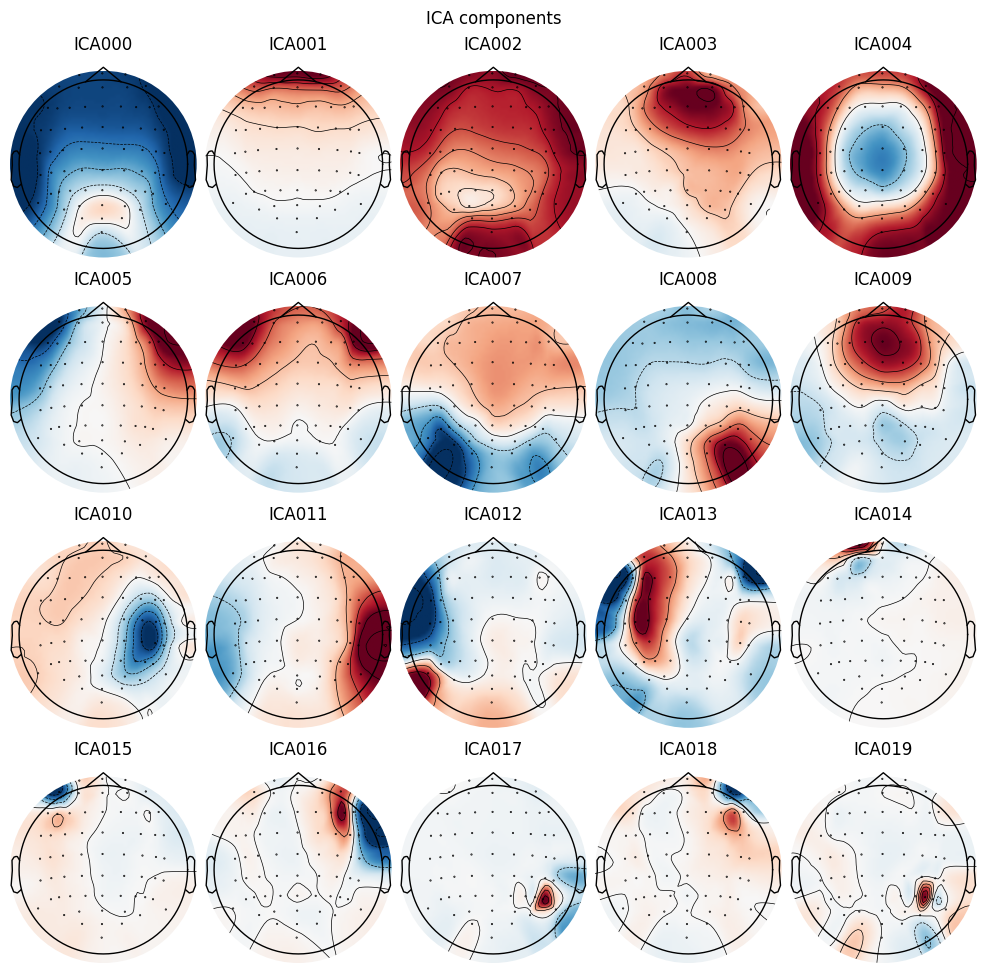

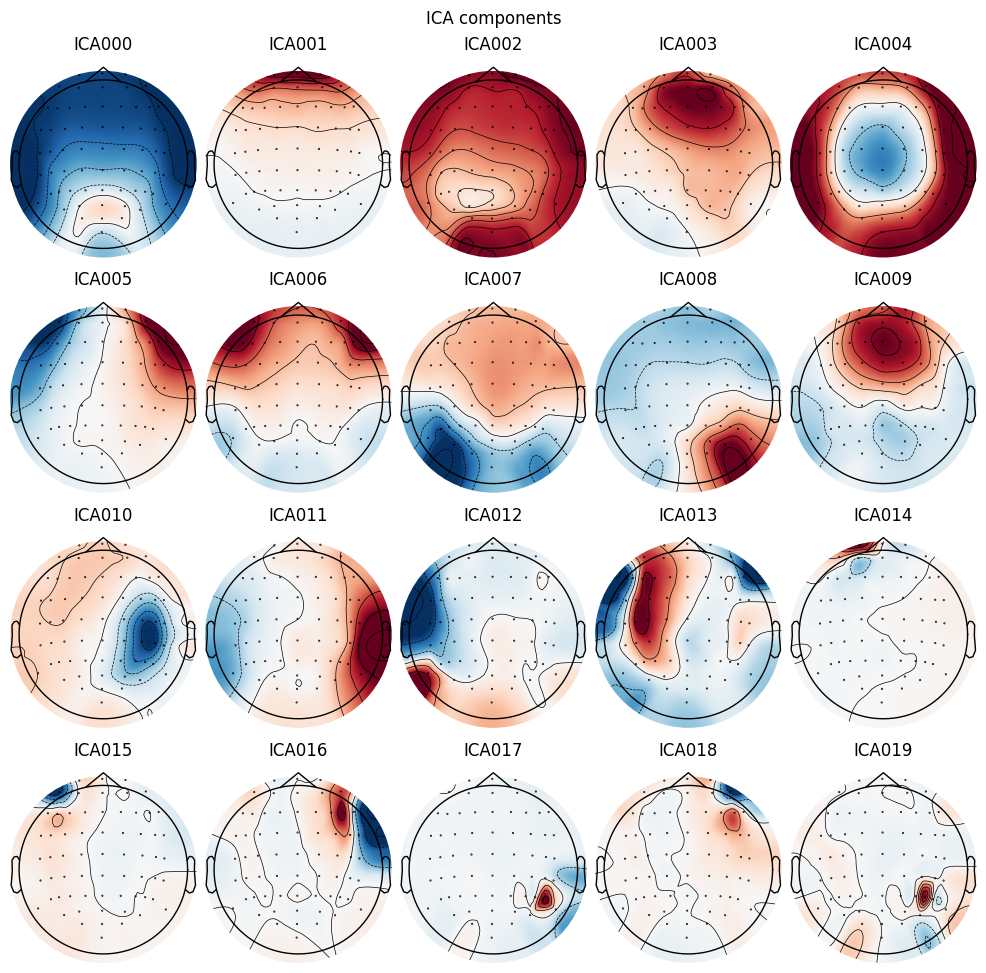

In [42]:
# Running ICA
ica = mne.preprocessing.ICA(n_components=20, random_state=0)
ica.fit(raw)
ica.plot_components()

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 6 ICA components
    Projecting back using 64 PCA components


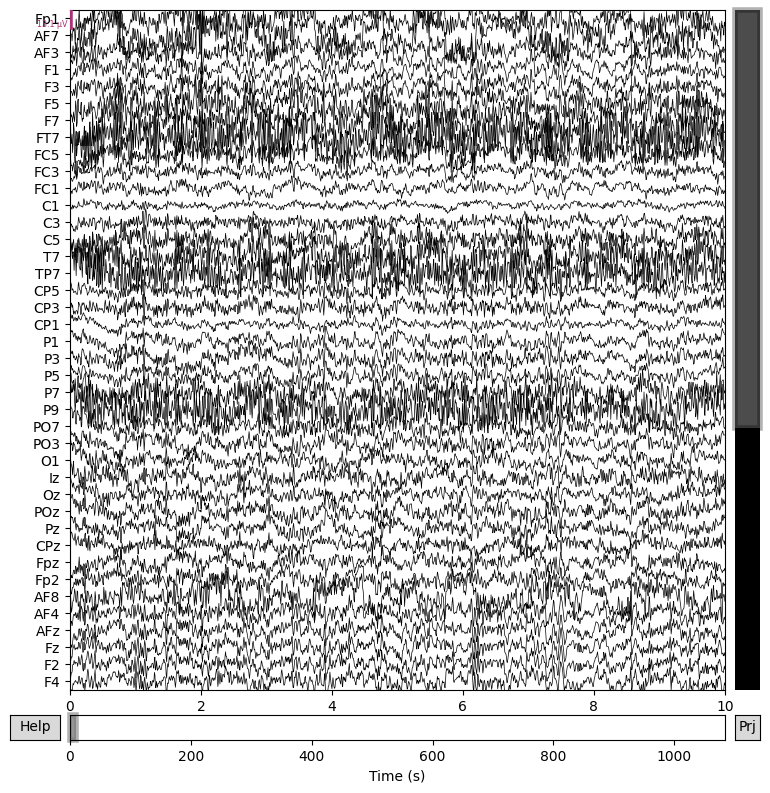

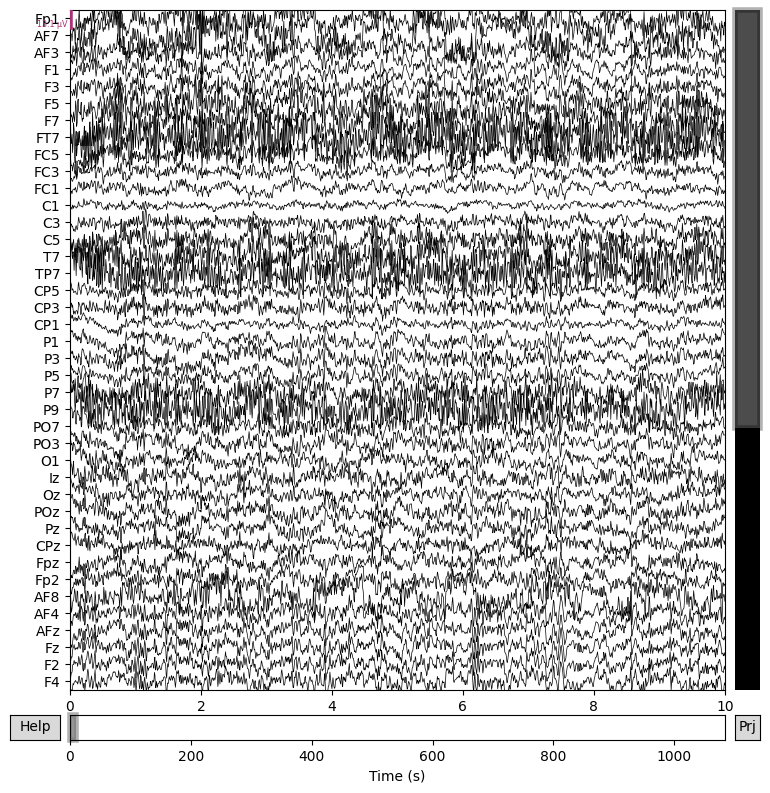

In [43]:
ica.exclude = [0, 1, 4, 7, 10, 12]
ica.apply(raw)
raw.plot(n_channels=40, scalings='auto')

In [44]:
events = mne.find_events(raw, stim_channel='Status')

Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
721 events found on stim channel Status
Event IDs: [ 20  42  50  75  99 100 200]


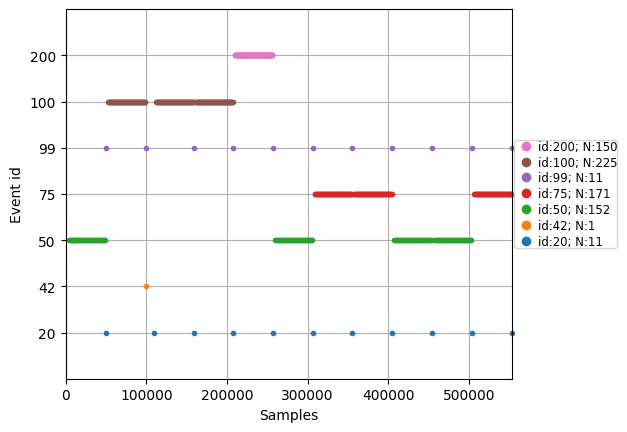

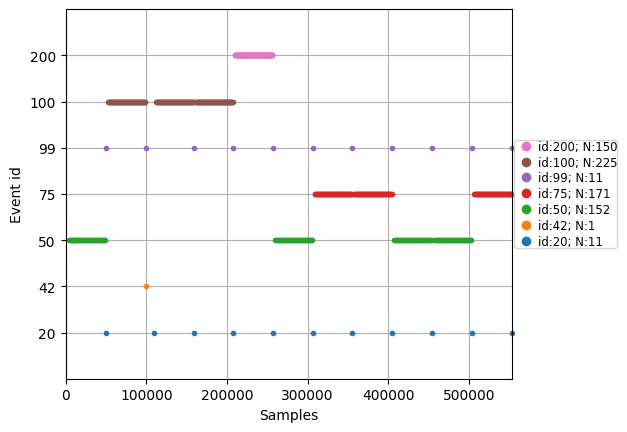

In [45]:
mne.viz.plot_events(events)

In [48]:
event_ids = {"standard/stimulus":200, "target/stimulus":100}
epochs = mne.Epochs(raw, events, event_id=event_ids, preload=True)
epochs = ica.apply(epochs, exclude=ica.exclude)

Not setting metadata
375 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 375 events and 359 original time points ...
0 bad epochs dropped
Applying ICA to Epochs instance
    Transforming to ICA space (20 components)
    Zeroing out 6 ICA components
    Projecting back using 64 PCA components


/tmp/ipython-input-48-3114018010.py:3: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs = ica.apply(epochs, exclude=ica.exclude)


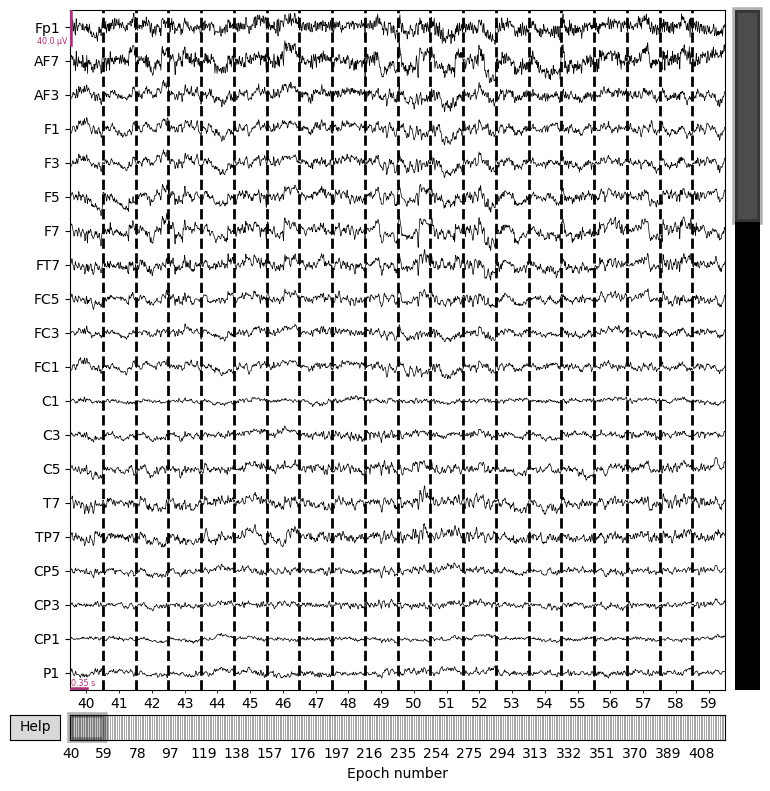

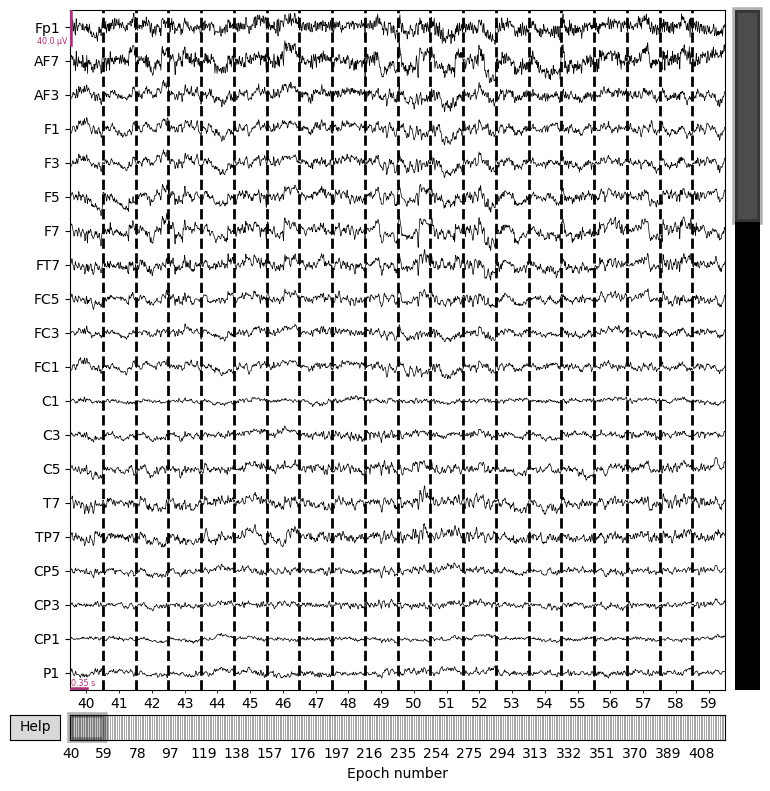

In [49]:
epochs.plot()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...
Applying baseline correction (mode: mean)


<Epochs | 375 events (all good), -0.199 – 0.5 s (baseline -0.199 – 0 s), ~66.8 MiB, data loaded,
 'standard/stimulus': 150
 'target/stimulus': 225>

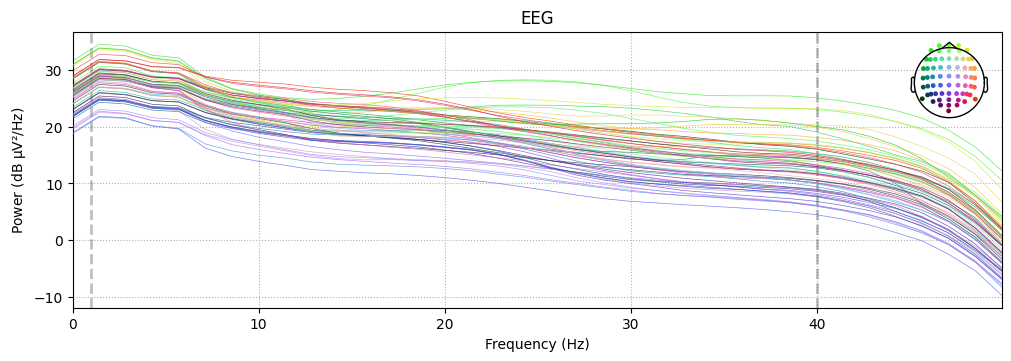

In [53]:
epochs.plot_psd(fmax=50)     # Power Spectral Density per epoch
epochs.info                  # Metadata
epochs.get_data().shape      # Shape: (n_epochs, n_channels, n_times)

# Baseline Correction
epochs.apply_baseline((None, 0))
